In [1]:
#] add DelimitedFiles

In [2]:
using DelimitedFiles
using PyPlot

In [3]:
url = "https://www.phys.uconn.edu/~rozman/Courses/P2200_25F/downloads/trinity-test.data"

"https://www.phys.uconn.edu/~rozman/Courses/P2200_25F/downloads/trinity-test.data"

In [4]:
obsevations = download(url)

"/tmp/jl_MdKpKjwTyD"

In [5]:
dat = readdlm(obsevations, comments=true, comment_char='#');

In [6]:
time = dat[:, 1]; 

In [7]:
radius = dat[:, 2];

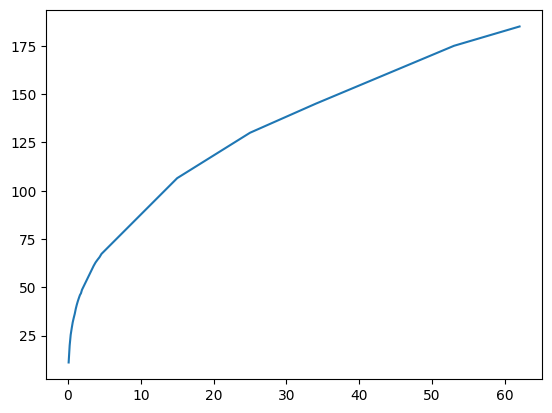

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x78cdade85940>

In [8]:
plot(time, radius)

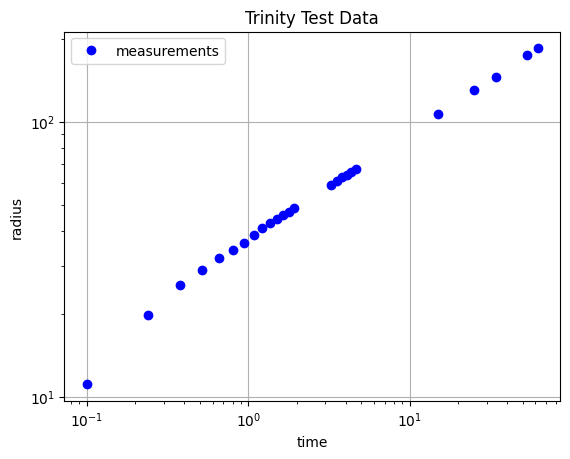

PyObject Text(0.5, 1.0, 'Trinity Test Data')

In [9]:
loglog(time, radius, "bo", label="measurements")
grid(true)
xlabel("time")
ylabel("radius")
legend()
title("Trinity Test Data")

In [15]:
nm = length(time[3:end])

23

In [16]:
tlogbar = sum(log.(time[3:end])) /nm

1.1363353005466241

In [17]:
rlogbar = sum(log.(radius[3:end])) /nm

4.063213128797501

In [18]:
alphalog = rlogbar - 2/5 * tlogbar

3.608679008578851

In [19]:
const scale = 1.0e6   # Extra factor due to measuring time in ms
const rho = 1.2       # Density of air in kg/m^3 at T = 20 C
const tnt = 4.184e12; # J per 1 kt of TNT

In [20]:
alpha = exp(alphalog)
println("α = $(round(alpha, sigdigits=4))")

α = 36.92


In [21]:
energyJ = scale * alpha^5 * rho 
println("E = $(round(energyJ, sigdigits=3)) Joules")

E = 8.23e13 Joules


In [22]:
energyT = energyJ / tnt  # Equivalent amount of TNT in kilotons
println("E = $(round(energyT, sigdigits=3)) kilotons of TNT")

E = 19.7 kilotons of TNT


In [23]:
rad(t, alpha) = alpha * t^(2/5);

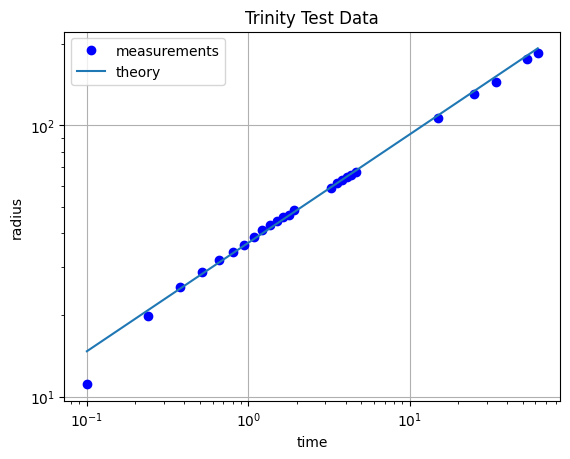

PyObject Text(0.5, 1.0, 'Trinity Test Data')

In [25]:
loglog(time, radius, "bo", label="measurements")
loglog(time, rad.(time, alpha), "-", label="theory")
grid(true)
xlabel("time")
ylabel("radius")
legend()
title("Trinity Test Data")